In [1]:
# !pip install overpy

In [1]:
import pandas as pd
pd.set_option('max_columns', 500)

import requests
import json

import re
from tqdm import tqdm

In [2]:
# https://github.com/hflabs/city
cities = pd.read_csv('data/city.csv')

cities.population = cities.population.apply(lambda x: x.split('[')[0]).astype(int)

cities.loc[cities.region=='Москва', 'city'] = "Москва"
cities.loc[cities.region=='Санкт-Петербург', 'city'] = "Санкт-Петербург"
cities.loc[cities.region=='Севастополь', 'city'] = "Севастополь"


cities.city = cities.city.apply(lambda x: {'Орёл': "Орел"}.get(x,x))

# cities = cities[~cities.foundation_year.str.contains('век')]
# cities = cities[~cities.foundation_year.str.contains('год')]
# cities = cities[~cities.foundation_year.str.contains('или')]
# cities = cities[~cities.foundation_year.str.contains('-')]

# cities.foundation_year = cities.foundation_year.astype(int)

cities = cities.drop('foundation_year', axis=1)

cities = cities[~((cities.city=='Железногорск') & (cities.region=='Красноярский'))]
cities = cities[~((cities.city=='Киров') & (cities.region=='Калужская'))]
cities = cities[~((cities.city=='Благовещенск') & (cities.region=='Башкортостан'))]


# cities = cities.sort_values('population', ascending=False)

In [3]:
cities.head(3)

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,settlement_type,settlement,kladr_id,fias_id,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,NaN,NaN,100000200000,ccdfd496-8108-4655-aadd-bd228747306d,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,NaN,NaN,100000100000,8cfbe842-e803-49ca-9347-1ef90481dd98,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,NaN,NaN,400000100000,0839d751-b940-4d3d-afb6-5df03fdd7791,4,2,84401000000,84701000,400,UTC+7,51.958103,85.960324,62861


In [4]:
cities[cities.city=='Пермь']

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,settlement_type,settlement,kladr_id,fias_id,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population
706,г Пермь,614000.0,Россия,Приволжский,край,Пермский,NaN,NaN,г,Пермь,NaN,NaN,5900000100000,a309e4ce-2f36-4106-b1ca-53e0f48a6d95,4,2,57401000000,57701000001,5900,UTC+5,58.010258,56.234203,1000679


In [5]:
# mo_cities = cities[cities.region.str.contains('Московская', na=False)]['city']

In [6]:
# def proc_wiki_pop(df):
#     dd = pd.DataFrame(columns=['year', 'pop'])
#     dff = df.T.reset_index()
#     for i in range(0,len(dff.columns),2):
#         temp = dff.iloc[:,i:i+2]
#         temp.columns = ['year', 'pop']
#         dd = pd.concat([dd, temp])
#     dd = dd[dd.year.notnull()]
#     dd['year'] = dd.year.apply(lambda x: int(x.split('[')[0]))
#     dd['pop'] = dd['pop'].apply(lambda x: x.replace("\xa0", ""))
#     dd['pop'] = dd['pop'].apply(lambda x: re.findall('\d+', x)[0])
#     dd = dd[dd.year>2009]
#     return dd

In [7]:
# from bs4 import BeautifulSoup
# city_pop_dict = {}

# # get the response in the form of html
# for city in tqdm(mo_cities):
#     if city == 'Королев':
#         city = city.replace('е', "ё") + "_(город)"
#     elif city in ['Жуковский', 'Домодедово', "Чехов", "Клин", "Дзержинский", "Истра", "Рошаль", "Пересвет"]:
#         city = city + "_(город)"
#     elif city in ["Краснознаменск", "Красноармейск"]:
#         city = city + '_(Московская_область)'
       
#     wikiurl= f"https://ru.wikipedia.org/wiki/{city}"
#     table_class="wikitable sortable jquery-tablesorter"
#     response=requests.get(wikiurl)
#     # print(response.status_code)

#     soup = BeautifulSoup(response.text, 'html.parser')
#     if city == 'Электросталь':
#         indiatable=soup.findAll('table',{'class':"standard"})[-1]
#     elif city == 'Реутов':
#         indiatable=soup.findAll('table',{'class':"standard"})[1]
#     elif city == 'Электроугли':
#         indiatable=soup.findAll('table',{'class':"wikitable"})[0]
#     else:
#         indiatable=soup.findAll('table',{'class':"standard"})[0]

#     df=pd.read_html(str(indiatable), skiprows=1)
#     # convert list to dataframe
#     df=pd.DataFrame(df[0])
# #         print(df.iloc[-2:,])

#     df_proc = proc_wiki_pop(df)
#     df_proc = df_proc.reset_index(drop=True)
#     df_proc['pop'] = df_proc['pop'].astype(int)
#     city_pop_dict[city] = df_proc

In [8]:
# mo_df = []
# for k in city_pop_dict.keys():
#     pop_last_y = city_pop_dict[k].iloc[-1:,].values[0][-1]
#     pop_5y = city_pop_dict[k].iloc[-5:-5+1,].values[0][-1]
#     pop_10y = city_pop_dict[k].iloc[-10:-10+1,].values[0][-1]
    
#     last_5y_change = (pop_last_y - pop_5y) / pop_5y * 100 
#     last_10y_change = (pop_last_y - pop_10y) / pop_10y * 100 
#     mo_df.append([k, pop_last_y, last_5y_change, last_10y_change])

# mo_df = pd.DataFrame(mo_df, columns = ['city', 'population', 'last5y_chg', 'last10y_chg'])

# mo_df.city = mo_df.city.apply(lambda x: x.split('_')[0])
# mo_df.city = mo_df.city.apply(lambda x: x.replace('Королёв', 'Королев'))

In [9]:
# set(mo_cities) - set(mo_df.city)

In [10]:
# mo_df.head()

In [11]:
from bs4 import BeautifulSoup

# get the response in the form of html
wikiurl="https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5_100_%D1%82%D1%8B%D1%81%D1%8F%D1%87_%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
# print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
# df.head()

df_popul = pd.concat([df['Город'], df['Население, тыс. человек'][['2021']]], axis=1)
df_popul.columns = ['city', 'population']

df_popul = pd.concat([df_popul, df['Население, тыс. человек'][['2021', '2016', '2011']]], axis=1)

df_popul = df_popul[df_popul.population>=100]  # 100к города россии
df_popul.city = df_popul.city.apply(lambda x: x.split('[')[0])
df_popul.city = df_popul.city.apply(lambda x: x.replace('ё', 'е'))
df_popul.shape

(171, 5)

In [12]:
df_popul['last5y_chg'] = df_popul.apply(lambda x: round((x['2021']-x['2016'])/x['2016']*100,2), axis=1)
df_popul['last10y_chg'] = df_popul.apply(lambda x: round((x['2021']-x['2011'])/x['2011']*100,2), axis=1)

In [13]:
df_popul.head()

,city,population,2021,2016,2011,last5y_chg,last10y_chg
0,Москва,12655,12655,12330,11541,2.64,9.65
1,Санкт-Петербург,5384,5384,5226,4899,3.02,9.90
2,Новосибирск,1620,1620,1584,1475,2.27,9.83
3,Екатеринбург,1495,1495,1444,1353,3.53,10.50
4,Казань,1257,1257,1217,1145,3.29,9.78


In [14]:
set(df_popul.city) - set(cities.city)

set()

In [15]:
# cities[cities.city.str.contains('Ор', na=False)]

In [16]:
df_popul = df_popul.drop(['2021', '2016', '2011'], axis=1)

In [17]:
df_popul.head()

,city,population,last5y_chg,last10y_chg
0,Москва,12655,2.64,9.65
1,Санкт-Петербург,5384,3.02,9.90
2,Новосибирск,1620,2.27,9.83
3,Екатеринбург,1495,3.53,10.50
4,Казань,1257,3.29,9.78


In [18]:
# df_popul = pd.concat([df_popul, mo_df])

In [19]:
# mo_df.shape

In [20]:
# df_popul[df_popul.duplicated('city')] #это 100к!!!

In [21]:
cities[(cities.duplicated('city')) & (cities.population > 50000)]

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,settlement_type,settlement,kladr_id,fias_id,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population
435,"Респ Крым, г Ялта",298600.0,Россия,Южный,Респ,Крым,NaN,NaN,г,Ялта,NaN,NaN,9100000800000,c64ea472-28c6-4242-968f-0e1a08830f8e,4,0,35419000000,35729000001,9103,UTC+3,44.495361,34.166308,76746
823,"Свердловская обл, г Березовский",623700.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Березовский,NaN,NaN,6600000300000,adf5df2b-2c2e-45a9-b971-05550353cf43,4,0,65412000000,65731000001,6678,UTC+5,56.909592,60.818091,51583
899,"Ставропольский край, г Михайловск",356240.0,Россия,Северо-Кавказский,край,Ставропольский,р-н,Шпаковский,г,Михайловск,NaN,NaN,2602700100000,51007e5c-e430-4f18-912c-f88c7e73698d,4,1,7258501000,7658101,2600,UTC+3,45.129732,42.028844,71018
1055,"Челябинская обл, г Озерск",456780.0,Россия,Уральский,обл,Челябинская,NaN,NaN,г,Озерск,NaN,NaN,7400001100000,8192c863-edbf-4825-8523-0612ae80e5a7,4,0,75543000000,75743000001,7413,UTC+5,55.763154,60.707620,82268


In [22]:
cities_upd = cities.merge(df_popul, how='inner', on='city').drop('population_x', axis=1).rename(columns={'population_y': 'population'})

In [23]:
cities_upd[cities_upd.duplicated(['city'])]

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,settlement_type,settlement,kladr_id,fias_id,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,last5y_chg,last10y_chg


In [24]:
cities_upd.shape

(171, 25)

# MAIN

In [328]:
ls overpass_out

bar_over.geojson                   omsnx_city_dict_restaurant_ALL.pickle
cafe_over.geojson                  omsnx_city_dict_school_ALL.pickle
omsnx_city_dict_bar_ALL.pickle     omsnx_city_dict_station.pickle
omsnx_city_dict_cafe_ALL.pickle    omsnx_city_dict_stop_position.pickle
omsnx_city_dict_commercial.pickle  omsnx_city_dict_supermarket.pickle
omsnx_city_dict_fuel.pickle        pub_over.geojson
omsnx_city_dict_office.pickle      restaurant_over.geojson
omsnx_city_dict_pub_ALL.pickle     school_over.geojson


In [ ]:
# city_dict_fuel = overapass_dict(cities_upd, 'amenity', 'fuel')
# city_dict_school = overapass_dict(cities_upd, 'amenity', 'school')
# city_dict_restaurant = overapass_dict(cities_upd, 'amenity', 'restaurant')

# city_dict_pub = overapass_dict(cities_upd, 'amenity', 'pub')
# city_dict_bar = overapass_dict(cities_upd, 'amenity', 'bar')
# city_dict_cafe = overapass_dict(cities_upd, 'amenity', 'cafe')


# city_dict_stop_position = overapass_dict(cities_upd, 'public_transport', 'stop_position') # автобус, трамвай
# city_dict_station = overapass_dict(cities_upd, 'public_transport', 'station') # метро

# city_dict_supermarket = overapass_dict(cities_upd, 'shop', 'supermarket') # supermarket

# city_dict_office = overapass_dict(cities_upd, 'building', 'office')
# city_dict_commercial = overapass_dict(cities_upd, 'building', 'commercial')

In [497]:
nm = 'omsnx_city_dict_stop_position'
amnt = 'stop_position'
bar = pd.read_pickle(f'overpass_out/{nm}.pickle')

In [498]:
set(cities_upd.city)-set(list(bar.keys()))

{'Артем',
 'Королев',
 'Курган',
 'Орел',
 'Ставрополь',
 'Томск',
 'Хабаровск',
 'Щелково'}

In [499]:
over_search = []
for k in bar.keys():
    try:
        bar[k].element_type.value_counts()
        if bar[k].element_type.value_counts().sum()<5:
            print(k, bar[k].element_type.value_counts().sum())
#         print('\n')
    except:
        over_search.append(k)

Нефтекамск 1
Октябрьский 4
Стерлитамак 1
Волжский 2
Камышин 1
Дербент 3
Элиста 3
Обнинск 2
Киров 1
Армавир 4
Ачинск 3
Железногорск 1
Елец 1
Ногинск 1
Электросталь 3
Оренбург 4
Балаково 2
Энгельс 3
Невинномысск 1
Северск 3
Нижневартовск 4
Копейск 1
Грозный 1
Новый Уренгой 3


In [500]:
over_search

['Рубцовск',
 'Благовещенск',
 'Северодвинск',
 'Уфа',
 'Брянск',
 'Каспийск',
 'Хасавюрт',
 'Назрань',
 'Красноярск',
 'Липецк',
 'Саранск',
 'Подольск',
 'Дзержинск',
 'Нижний Новгород',
 'Пенза',
 'Находка',
 'Альметьевск',
 'Зеленодольск',
 'Кызыл',
 'Нефтеюганск',
 'Ханты-Мансийск',
 'Якутск']

In [501]:
bar['Уфа'] = ox.geometries_from_place('Уфа,  Россия', {"public_transport": amnt}).reset_index()
bar['Брянск'] = ox.geometries_from_place('Брянск,  Брянская Область, Россия', {"public_transport": amnt}).reset_index()
bar['Красноярск'] = ox.geometries_from_place('Красноярск,  Россия', {"public_transport": amnt}).reset_index()
bar['Липецк'] = ox.geometries_from_place('Lipetsk', {"public_transport": amnt}).reset_index()
bar['Нижний Новгород'] = ox.geometries_from_place('Nizhny Novgorod', {"public_transport": amnt}).reset_index()
bar['Саранск'] = ox.geometries_from_place('город Саранск', {"public_transport": amnt}).reset_index()

bar['Хабаровск'] = ox.geometries_from_place('Хабаровск, Хабаровский край, Россия', {"public_transport": amnt}).reset_index()
bar['Волжский'] = ox.geometries_from_place('город Волжский, Россия', {"public_transport": amnt}).reset_index()
bar['Дзержинск'] = ox.geometries_from_place('Dzerzhinsk', {"public_transport": amnt}).reset_index()

In [478]:
# ox.geometries_from_place('Томск, Россия', {"building": amnt}).reset_index()

In [479]:
# bar['Санкт-Петербург'] = gpd.read_file('overpass_out/peter_cafe.geojson')

In [502]:
# assert len(ox.geometries_from_place('Saint Petersburgг', {"amenity": amnt}).reset_index())>0
assert len(bar['Санкт-Петербург'])>0

In [503]:
# Томск
# Ставрополь

# Находка

# Нефтекамск
# Дербент
# Назрань
# Зеленодольск
# Нижнекамск
# Димитровград

In [504]:
import pickle
with open(f'overpass_out/{nm}.pickle', 'wb') as handle:
    pickle.dump(bar, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [140]:
sss[sss.name.notnull()].shape

(58, 38)

In [506]:
# bar1['Москва']#['element_type']#.value_counts()

In [511]:
ls overpass_out

omsnx_city_dict_bar_ALL.pickle         omsnx_city_dict_restaurant_ALL.pickle
omsnx_city_dict_cafe_ALL.pickle        omsnx_city_dict_school_ALL.pickle
omsnx_city_dict_commercial_ALL.pickle  omsnx_city_dict_station_ALL.pickle
omsnx_city_dict_fuel_ALL.pickle        omsnx_city_dict_stop_position_ALL.pickle
omsnx_city_dict_office_ALL.pickle      omsnx_city_dict_supermarket_ALL.pickle
omsnx_city_dict_pub_ALL.pickle


# main-2

In [514]:
bar = pd.read_pickle('overpass_out/omsnx_city_dict_bar_ALL.pickle')

In [537]:
import numpy as np

In [539]:
bar_df = pd.DataFrame()
for k in tqdm(list(bar.keys())):
    bar_df_city = bar[k]
    if len(bar_df_city)>0:
        bar_df_city['city'] = k
        if 'name' not in bar_df_city.columns:
            bar_df_city['name'] = np.nan
        bar_df_city = bar_df_city[['city', 'element_type', 'amenity', 'osmid', 'amenity', 'name', 'geometry']]
        bar_df = pd.concat([bar_df, bar_df_city])

100%|██████████| 171/171 [00:45<00:00,  3.78it/s]


In [544]:
bar_df.tail()

,city,element_type,amenity,osmid,amenity,name,geometry
5,Хабаровск,node,bar,4427238689,bar,NaN,POINT (135.06569 48.46516)
6,Хабаровск,node,bar,4481622593,bar,Допинг Бар,POINT (135.05221 48.47428)
7,Хабаровск,node,bar,5154590542,bar,KhaBpub,POINT (135.11118 48.38161)
8,Хабаровск,way,bar,268572451,bar,NaN,"POLYGON ((135.08198 48.46967, 135.08206 48.469..."
9,Хабаровск,way,bar,544760183,bar,NaN,"POLYGON ((135.11122 48.38172, 135.11110 48.381..."


In [546]:
bar_df['center'] = bar_df.geometry.centroid

/home/atuthvatullin/environments/albert/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [560]:
str(bar_df['center'].values[0])

'POINT (40.1259685 44.584235)'

In [572]:
bar_df['center'].values[0].coords.xy

(array('d', [40.1259685]), array('d', [44.584235]))

In [580]:
bar_df['center'] = bar_df['center'].apply(lambda x: (x.coords.xy[1][0], x.coords.xy[0][0]))

In [584]:
bar_df['lat'] = bar_df['center'].apply(lambda x: x[0])
bar_df['lon'] = bar_df['center'].apply(lambda x: x[0])

In [589]:
bar_df.to_csv('overpass_out/omsnx_city_dict_bar_ALL_DF.csv', index=False)

# overpass

In [110]:
import overpy
from tqdm import tqdm
import time

api = overpy.Overpass()

In [26]:
# area["ISO3166-1"="DE"][admin_level=2];
# out skel qt;
# area[name="Россия"];

In [27]:
def overpass_city(city, tip, place):
    
    overpass_url = "http://overpass-api.de/api/interpreter"
    tip = '"' + tip + '"'
    place = '"' + place + '"'
    city = '"' + city + '"'
    
    overpass_query = """
        [out:json];
        area[name="""+city+"""];
        (
          node["""+tip+"""="""+place+"""](area);
        );
        out;
        
        """
    response = requests.get(overpass_url, 
                        params={'data': overpass_query})
    try:
        data = response.json()
    except:
        return None
    return data

In [28]:
def overapass_dict(df, tip, place):

    city_dict = {}
    

    for city in tqdm(df.city):

        if city in ['Королев', 'Артем', 'Щелково', 'Орел']:
            city = city.replace('е', "ё")

        try:
            time.sleep(30)
            Data = overpass_city(city, tip, place)

        except:
            time.sleep(60)
            Data = overpass_city(city, tip, place)

        city = city.replace('"', '')
        city_dict[city] = Data
        
    return city_dict

In [29]:
# fuel_l = []
# for k in city_dict_fuel.keys():
#     fuel_l.append([k, len(city_dict_fuel[k]['elements'])])
# fuel_df = pd.DataFrame(fuel_l, columns = ['city', 'cnt'])
# fuel_df = fuel_df.sort_values('cnt', ascending=False)

In [30]:
# fuel_df[fuel_df.cnt<10]

In [31]:
city_dict_stop_position = {}

In [32]:
tip = 'public_transport'
place = 'stop_position'

for city in tqdm(cities_upd.city):

    if city in ['Королев', 'Артем', 'Щелково', 'Орел']:
        city = city.replace('е', "ё")

    try:
        time.sleep(30)
        Data = overpass_city(city, tip, place)

    except:
        time.sleep(60)
        Data = overpass_city(city, tip, place)

    city = city.replace('"', '')
    city_dict_stop_position[city] = Data
    
# city_dict_school = overapass_dict(cities_upd, 'amenity', 'school')

  0%|          | 0/171 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [64]:
len(city_dict_stop_position)

171

In [65]:
import pickle
with open('overpass_out/city_dict_stop_position.pickle', 'wb') as handle:
    pickle.dump(city_dict_stop_position, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
city_dict_fuel = overapass_dict(cities_upd, 'amenity', 'fuel')
city_dict_school = overapass_dict(cities_upd, 'amenity', 'school')
city_dict_restaurant = overapass_dict(cities_upd, 'amenity', 'restaurant')

city_dict_pub = overapass_dict(cities_upd, 'amenity', 'pub')
city_dict_bar = overapass_dict(cities_upd, 'amenity', 'bar')
city_dict_cafe = overapass_dict(cities_upd, 'amenity', 'cafe')

city_dict_stop_position = overapass_dict(cities_upd, 'public_transport', 'stop_position') # автобус, трамвай
city_dict_station = overapass_dict(cities_upd, 'public_transport', 'station') # метро

city_dict_supermarket = overapass_dict(cities_upd, 'shop', 'supermarket') # supermarket

city_dict_office = overapass_dict(cities_upd, 'building', 'office')
city_dict_commercial = overapass_dict(cities_upd, 'building', 'commercial')

  1%|          | 1/171 [01:49<5:11:29, 109.94s/it]


KeyboardInterrupt: 

In [111]:
import osmnx as ox

In [112]:
ent_dict = dict()

In [113]:
for city in tqdm(cities_upd.city[61+74+9:]):
# for city in tqdm(['Томск', 'Хабаровск']):

    if city in ['Королев', 'Артем', 'Щелково', 'Орел']:
        city = city.replace('е', "ё")

    ent_dict[city] = ox.geometries_from_place(city, {"amenity": "fuel"}).reset_index()

  4%|▎         | 1/27 [00:02<00:57,  2.22s/it]


KeyboardInterrupt: 

In [119]:
ox.geometries_from_place('Саранск', {"amenity": "school"}).reset_index()

,index,geometry


In [ ]:
'Уфа|Брянск|Красноярск|Липецк|Саранск|Нижний Новгород'

In [30]:
import pickle
with open('overpass_out/omsnx_city_dict_fuel.pickle', 'wb') as handle:
    pickle.dump(ent_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
ls overpass_out

city_dict_bar.pickle                omsnx_city_dict_cafe_119_end.pickle
city_dict_cafe.pickle               omsnx_city_dict_pub_143.pickle
city_dict_fuel.pickle               omsnx_city_dict_pub_144_end.pickle
city_dict_pub.pickle                omsnx_city_dict_pub_2_middle.pickle
city_dict_restaurant.pickle         omsnx_city_dict_restaurant_170.pickle
city_dict_school.pickle             omsnx_city_dict_restaurant_1.pickle
omsnx_city_dict_bar_143.pickle      omsnx_city_dict_school_143.pickle
omsnx_city_dict_bar_144_end.pickle  omsnx_city_dict_school_144_end.pickle
omsnx_city_dict_cafe_118.pickle


In [53]:
pub1 = pd.read_pickle('overpass_out/omsnx_city_dict_pub_143.pickle')
pub2 = pd.read_pickle('overpass_out/omsnx_city_dict_pub_144_end.pickle')
pub3 = pd.read_pickle('overpass_out/omsnx_city_dict_pub_2_middle.pickle')

In [54]:
pub1.update(pub2)

In [55]:
pub1.update(pub3)

In [58]:
assert len(pub1)==171

In [59]:
set(cities_upd.city) - set(pub1.keys())

{'Артем', 'Королев', 'Орел', 'Щелково'}

In [44]:
import pickle
with open('overpass_out/omsnx_city_dict_pub_ALL.pickle', 'wb') as handle:
    pickle.dump(pub1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
STOP

In [132]:
# river
# forest
# pond

In [3]:
import osmnx as ox

In [ ]:
# place_name = "Пермь"
# parks = ox.geometries_from_place(place_name, {"leisure": "park"})
# # fuel = ox.geometries_from_place(place_name, {"amenity": "fuel"})
# # river = ox.geometries_from_place(place_name, {"waterway": "river"})

In [ ]:
# parks['geometry'].centroid.apply(lambda x: x.coords)

In [371]:
parks = parks.to_crs('epsg:32637')# меняем проекцию для корректного расчета расстояний

parks = parks.reset_index()
parks['area'] = parks.area / 10**6

In [380]:
parks_temp = parks[parks['area']>0]

In [382]:
parks_temp

,element_type,osmid,barrier,geometry,leisure,name,tourism,nodes,old_name,wikidata,wikipedia,alt_name,name:de,name:en,leaf_type,natural,landuse,fence_type,height,wheelchair,description,ways,type,area
2,way,25063656,NaN,"POLYGON ((3639316.195 8017712.364, 3639048.461...",park,"ПКиО ""Балатово""",NaN,"[272703701, 1888549728, 1888549730, 272703702,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.077847
3,way,25106910,NaN,"POLYGON ((3640405.205 8025592.106, 3640463.988...",park,Сквер им. Розалии Землячки,NaN,"[273297503, 273297504, 273297505, 273297506, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033282
5,way,25107733,NaN,"POLYGON ((3640015.044 8026226.849, 3640001.634...",park,NaN,NaN,"[273317007, 7117282219, 7117282221, 1344306414...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023367
6,way,25347920,NaN,"POLYGON ((3639054.891 8021977.224, 3639133.546...",park,Сквер Уральских добровольцев,NaN,"[276237983, 1430536444, 6498382529, 276237984,...",Чёрный рынок,Q4518915,ru:Чёрный рынок (Пермь),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016037
7,way,25376945,NaN,"POLYGON ((3638678.176 8019363.481, 3638726.542...",park,Сквер им. Ф. Э. Дзержинского,NaN,"[276597820, 6960725575, 558932692, 558932688, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013935
8,way,25482034,NaN,"POLYGON ((3638435.447 8019296.781, 3638473.040...",park,Сквер 250-летия г. Перми,NaN,"[3945218968, 3945217654, 6291471442, 394527672...",NaN,Q4345319,ru:Парк камней,Парк камней,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063209
9,way,26235745,NaN,"POLYGON ((3639587.813 8022975.920, 3639569.584...",park,Театральный сад,NaN,"[287283491, 287283543, 2874495552, 287283741, ...",NaN,NaN,NaN,NaN,Theatergarten,Theatre Garden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.065205
10,way,26583105,NaN,"POLYGON ((3640077.022 8023422.594, 3640104.028...",park,Сад Декабристов,NaN,"[291521472, 291521473, 291521474, 291521475, 8...",NaN,NaN,NaN,Тюремный парк,NaN,NaN,broadleaved,wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017123
12,way,31276543,NaN,"POLYGON ((3639138.287 8021488.102, 3639140.250...",park,Эспланада,NaN,"[348000612, 6732813025, 1788803232, 6732813026...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030025
13,way,31277521,NaN,"POLYGON ((3641094.520 8018594.441, 3641222.067...",park,Сквер имени Миндовского,NaN,"[348008720, 4768327561, 348008721, 348008723, ...",NaN,Q16698236,ru:Сквер Миндовского,NaN,NaN,NaN,NaN,wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122076


In [ ]:
parks_temp.plot(figsize=(15,10), color='whitesmoke', linestyle=':', edgecolor='black')
parks_temp.to_crs(epsg=32637).plot(markersize=1, ax=ax)

In [182]:
# fuel.reset_index()#['geometry'].astype(str)[0]

In [ ]:
# fig, ax = ox.plot_footprints(fuel, figsize=(20, 20))

# coord to city

In [ ]:
# import geocoder

# for i in tqdm(range(120000)):
#     g = geocoder.osm([59.8150210, 30.3220263], method='reverse')
# #     g.json['city']

# folium 

In [395]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [414]:
# Create a base map
m_4 = folium.Map(location=[60,100], tiles='cartodbpositron', zoom_start=3
                )

# Add a bubble map to the base map
for i in range(0,len(cities_upd)):
    Marker(
        location=[cities_upd.iloc[i]['geo_lat'], cities_upd.iloc[i]['geo_lon']],
        radius=float(cities_upd.iloc[i]['population'])*10).add_to(m_4)

# Display the map
m_4

In [ ]:
geo_lat	geo_lon	population

# shp

In [ ]:
# !pip install geoplot

In [1]:
import geopandas as gpd
adm = gpd.read_file("data/adm_ter_shp/admin_level_6.shp",encoding='cp1251') # 8, 6

ModuleNotFoundError: No module named 'geoplot'

In [553]:
adm.shape

(2367, 118)

In [558]:
# adm

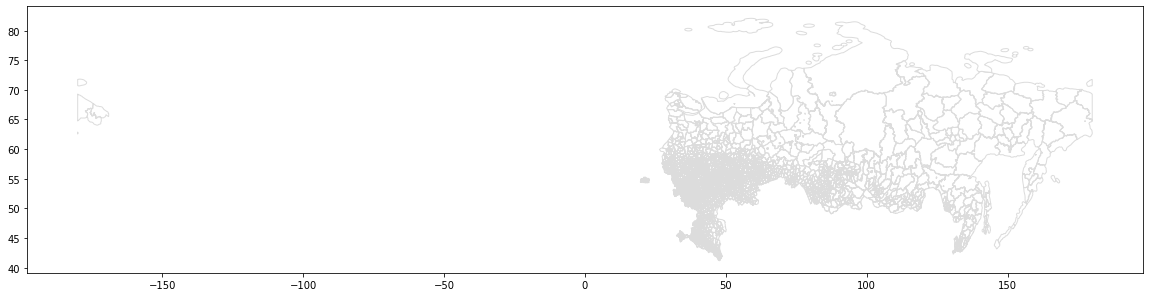

In [556]:
adm.plot(figsize=(20,15), color='none', edgecolor='gainsboro', zorder=3);

In [19]:
from shapely.geometry import Point

In [20]:
Point

shapely.geometry.point.Point

In [ ]:
# git clone
# git pull

In [ ]:
# !conda install geoplot -c conda-forge

In [ ]:
# cities['geometry'] = cities.apply(lambda x: Point(x['geo_lat'], x['geo_lon']), axis=1)

In [ ]:
# ax = adm.plot(figsize=(20,15), color='none', edgecolor='gainsboro', zorder=3)
# cities.plot(color='lightgreen', ax=ax);